In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

print("✓ Imports successful!")

✓ Imports successful!


In [2]:
df = pd.read_csv('../data/reviews_cleaned.csv')

print(f"Loaded {len(df)} reviews")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Loaded 1800 reviews

Columns: ['review', 'rating', 'date', 'bank', 'source']

First few rows:


,review,rating,date,bank,source
0,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play
1,good app,5,2025-11-28,CBE,Google Play
2,This application is very important and advanta...,5,2025-11-27,CBE,Google Play
3,why didn't work this app?,1,2025-11-27,CBE,Google Play
4,The app makes our life easier. Thank you CBE!,5,2025-11-27,CBE,Google Play


In [3]:
def analyze_sentiment(text):
    """Analyze sentiment using VADER"""
    if pd.isna(text) or text == '':
        return {'pos': 0, 'neg': 0, 'neu': 1, 'compound': 0}
    
    scores = analyzer.polarity_scores(str(text))
    return scores

def classify_sentiment(compound_score):
    """Classify sentiment based on compound score"""
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

print("✓ Functions defined")

✓ Functions defined


In [4]:
print("Analyzing sentiment...")
sentiments = df['review'].apply(analyze_sentiment)

# Extract scores into separate columns
df['sentiment_pos'] = sentiments.apply(lambda x: x['pos'])
df['sentiment_neg'] = sentiments.apply(lambda x: x['neg'])
df['sentiment_neu'] = sentiments.apply(lambda x: x['neu'])
df['sentiment_score'] = sentiments.apply(lambda x: x['compound'])

# Classify sentiment
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

print("✓ Sentiment analysis complete!")
df[['review', 'rating', 'sentiment_score', 'sentiment_label']].head(10)

Analyzing sentiment...
✓ Sentiment analysis complete!


,review,rating,sentiment_score,sentiment_label
0,maaliif daddafee install gaafata,3,0.0000,neutral
1,good app,5,0.4404,positive
2,This application is very important and advanta...,5,0.5198,positive
3,why didn't work this app?,1,0.0000,neutral
4,The app makes our life easier. Thank you CBE!,5,0.6800,positive
5,this app very bad 👎,1,-0.5849,negative
6,the most advanced app. but how to stay safe?,5,0.6701,positive
7,Good application,4,0.4404,positive
8,It is nice app,5,0.4215,positive
9,best,5,0.6369,positive


In [5]:
print("=== SENTIMENT ANALYSIS SUMMARY ===\n")
print(f"Total reviews analyzed: {len(df)}")
print(f"Reviews with sentiment scores: {df['sentiment_score'].notna().sum()}")
print(f"Success rate: {(df['sentiment_score'].notna().sum() / len(df) * 100):.2f}%\n")

print("=== Sentiment Distribution ===")
print(df['sentiment_label'].value_counts())
print()

print("=== Sentiment by Bank (%)=== ")
sentiment_by_bank = pd.crosstab(df['bank'], df['sentiment_label'], normalize='index') * 100
print(sentiment_by_bank.round(2))
print()

print("=== Average Sentiment Score by Bank ===")
print(df.groupby('bank')['sentiment_score'].mean().round(3))
print()

print("=== Sentiment by Rating ===")
print(df.groupby('rating')['sentiment_score'].mean().round(3))

=== SENTIMENT ANALYSIS SUMMARY ===

Total reviews analyzed: 1800
Reviews with sentiment scores: 1800
Success rate: 100.00%

=== Sentiment Distribution ===
sentiment_label
positive    1017
neutral      482
negative     301
Name: count, dtype: int64

=== Sentiment by Bank (%)=== 
sentiment_label  negative  neutral  positive
bank                                        
BOA                 32.67    30.33     37.00
CBE                  7.50    30.33     62.17
Dashen              10.00    19.67     70.33

=== Average Sentiment Score by Bank ===
bank
BOA       0.000
CBE       0.290
Dashen    0.387
Name: sentiment_score, dtype: float64

=== Sentiment by Rating ===
rating
1   -0.171
2    0.046
3    0.221
4    0.366
5    0.430
Name: sentiment_score, dtype: float64


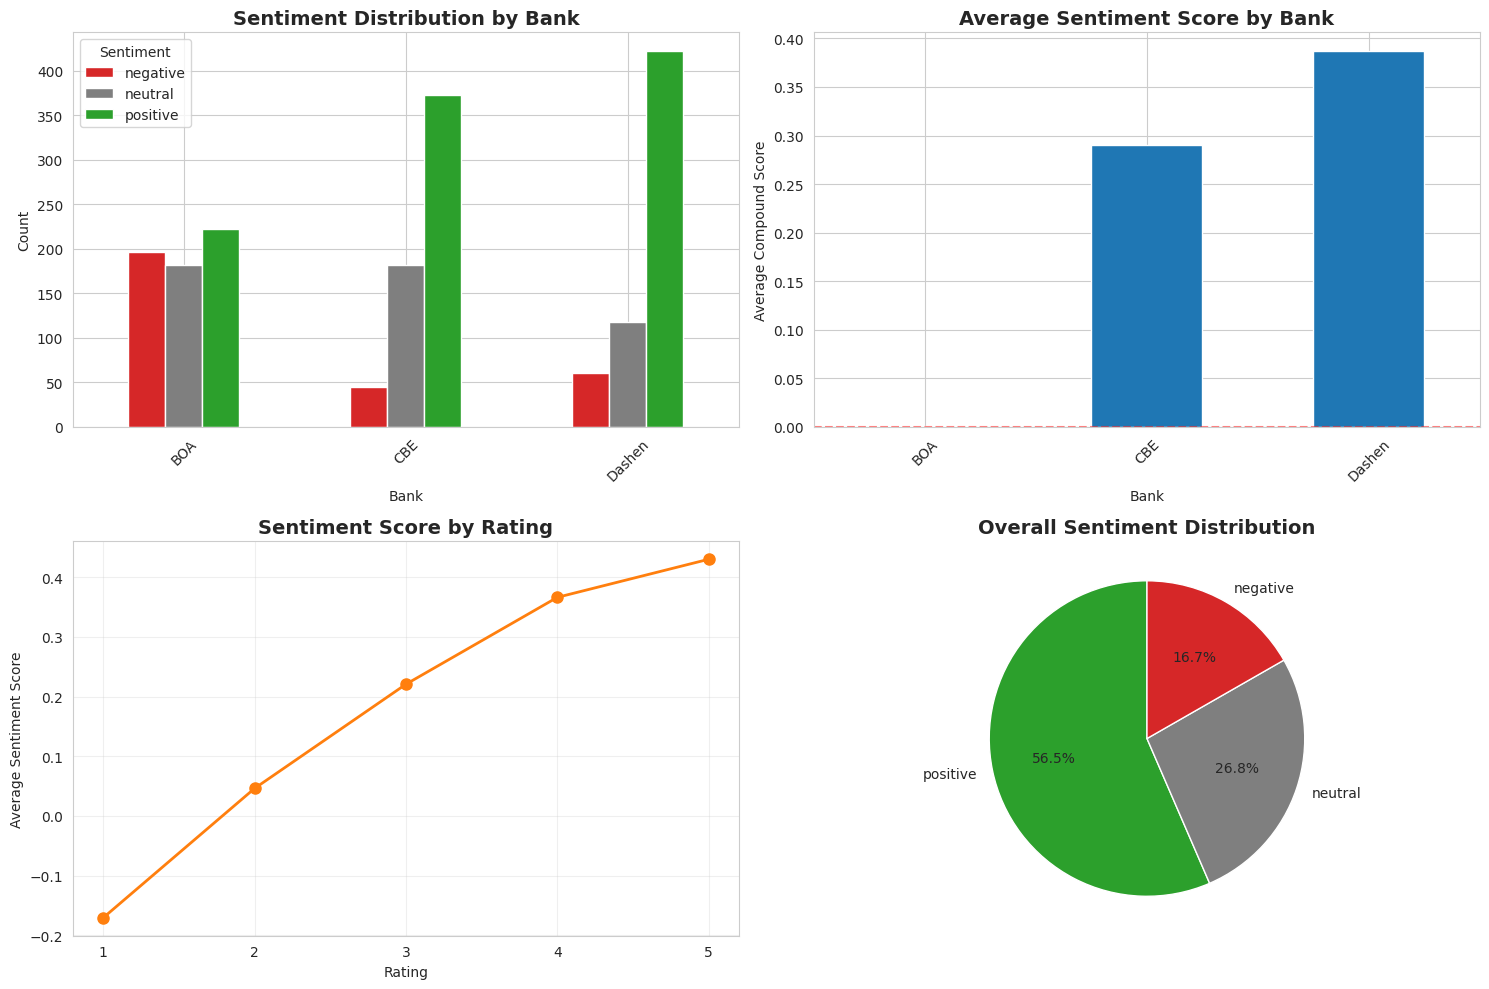

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sentiment counts by bank
sentiment_counts = pd.crosstab(df['bank'], df['sentiment_label'])
sentiment_counts.plot(kind='bar', ax=axes[0, 0], 
                     color=['#d62728', '#7f7f7f', '#2ca02c'])
axes[0, 0].set_title('Sentiment Distribution by Bank', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Bank')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Sentiment')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Average sentiment score by bank
df.groupby('bank')['sentiment_score'].mean().plot(kind='bar', ax=axes[0, 1], 
                                                   color='#1f77b4')
axes[0, 1].set_title('Average Sentiment Score by Bank', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Bank')
axes[0, 1].set_ylabel('Average Compound Score')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Sentiment by rating
rating_sentiment = df.groupby('rating')['sentiment_score'].mean()
axes[1, 0].plot(rating_sentiment.index, rating_sentiment.values, 
               marker='o', linewidth=2, markersize=8, color='#ff7f0e')
axes[1, 0].set_title('Sentiment Score by Rating', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Average Sentiment Score')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([1, 2, 3, 4, 5])

# 4. Sentiment distribution (pie chart)
sentiment_dist = df['sentiment_label'].value_counts()
colors = {'positive': '#2ca02c', 'neutral': '#7f7f7f', 'negative': '#d62728'}
sentiment_dist.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%',
                   colors=[colors[label] for label in sentiment_dist.index],
                   startangle=90)
axes[1, 1].set_title('Overall Sentiment Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()